In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

import pickle   # for saving the model

## Functions

In [40]:
def load_training_data():
    """
    Loads cleaned training data in a dataframe
    """

    output = pd.read_csv('../../data/Exported_Tables/final_features.csv', index_col='Unnamed: 0')

    return output

def scale_data(X, doit=True):
    if doit == True:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        pass
    
    return X_scaled



## Process

### Train Test Split

In [119]:
df = load_training_data()
# any final column drops?
#df.drop(['carrier_count', 'tail_count', 'hour_count', 'crs_elapsed_time', 'day', 'month', 'speed'], axis=1, inplace=True)

In [120]:
# drop test
df.drop(['route_var', 'route_count'], axis=1, inplace=True)

In [110]:
df.shape

(623432, 33)

In [124]:
X = np.array(df.drop('arr_delay', axis=1))
y = np.array(df['arr_delay'])

In [123]:
# do we want to scale X?
X_scaled = scale_data(X, True)

In [80]:
##### TESTING REMOVEEE ### 
#X_pca = np.array(X_pca)

In [125]:
# did we scale? If not change X_scaled to X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=666)

### Linear Regression

In [126]:
model = LinearRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training r^2: ", train_score)
print("Testing r^2:  ", test_score)

Training r^2:  0.40411743868702354
Testing r^2:   0.4025129767465151


In [96]:
# save model to disk
filename = '../../output/models/lr_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [100]:
#load model from disk
filename = '../../output/models/lr_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
results = loaded_model.score(X_test, y_test)
print('Test r^2 Score: ', results)

Test r^2 Score:  0.3749454322130873


### Polynomial Regression 2

In [95]:
model = LinearRegression()

# create poly features 
Xpoly_train = PolynomialFeatures(degree=2).fit_transform(X_train)
Xpoly_test = PolynomialFeatures(degree=2).fit_transform(X_test)
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# train model
model.fit(Xpoly_train, y_train)
ypoly_train_pred = model.predict(Xpoly_train)
ypoly_test_pred = model.predict(Xpoly_test)

# Check performance on train and test set
r2poly_train = r2_score(y_train, ypoly_train_pred)
r2poly_test = r2_score(y_test, ypoly_test_pred)
print(f'Train R^2:\t{r2poly_train}\nTest R^2:\t{r2poly_test}')

Number of polynomial features: 435
Train R^2:	0.4287746907567047
Test R^2:	-1.24872038230674


In [88]:
# save model to disk
filename = '../../output/models/r_poly_model481.sav'
pickle.dump(model, open(filename, 'wb'))

In [102]:
filename = '../../output/models/r_poly_model481.sav'
loaded_model = pickle.load(open(filename, 'rb'))
results = loaded_model.score(Xpoly_test, y_test)
print('Test r^2 Score: ', results)

Test r^2 Score:  -9008.372350314108


# SCRAP

<AxesSubplot:>

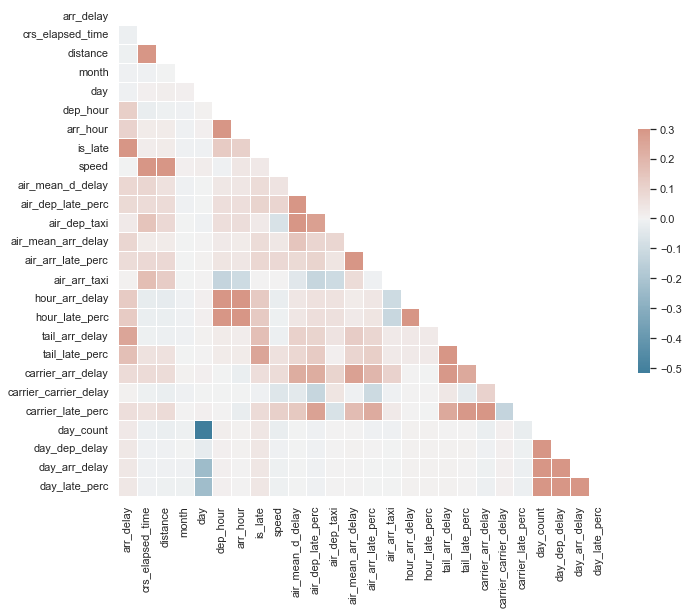

In [48]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#['crs_elapsed_time', 'day', 'month', 'speed', ]

### PCA?
Coulnd not get a good result

In [61]:
from sklearn.decomposition import PCA

In [59]:
X_scaled = scale_data(X, True)

Text(0, 0.5, '% Cumulative explained variance')

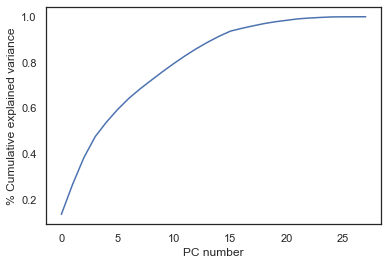

In [65]:
pca = PCA()
pca.fit(X_scaled)

reduced_X = pca.transform(X_scaled)

cum_explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_var)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [66]:
pca_out = PCA().fit(X_scaled)


#get component variance
np.cumsum(pca_out.explained_variance_ratio_)

array([0.13463303, 0.26641274, 0.38311151, 0.47493605, 0.53876579,
       0.59430235, 0.64329065, 0.68474784, 0.72287729, 0.76030502,
       0.79598996, 0.82966898, 0.86085036, 0.88905508, 0.91480362,
       0.93695214, 0.94918743, 0.95999651, 0.97016554, 0.97819302,
       0.98451948, 0.99077672, 0.99437293, 0.99700177, 0.99921233,
       0.99957622, 0.99984619, 1.        ])

In [79]:
scores_pca = pca.transform(X_scaled)
X_pca = pd.DataFrame(scores_pca).iloc[:, :20]
X_pca
# do it to 20 due to the curve above

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.077956,-2.775250,-1.530517,-1.907997,0.629760,-0.811917,0.361711,-0.365488,0.562329,-0.018479,-0.263850,-0.255609,0.050597,-0.289378,0.910040,-0.194559,-0.108960,-0.029740,0.100914,-0.570702
1,-2.777363,-1.156995,-0.990601,-2.220118,0.266165,1.566545,0.440748,0.437222,0.561066,1.265851,-1.350508,-0.263935,0.636051,-0.681195,0.435328,-0.729447,0.093218,-0.428623,-0.443651,-0.363629
2,-3.243333,-1.160987,-1.934389,-1.862739,0.163579,0.213962,0.752568,0.386513,0.599760,0.941594,-0.900658,1.759174,-1.215396,0.228083,0.152837,-0.682224,0.254966,-0.975224,-0.412865,0.006326
3,2.028563,-3.010154,-0.329105,-1.900393,1.554577,-1.122946,-0.711137,-0.297861,0.875599,0.126262,1.726377,3.079890,-0.928257,-2.182207,0.477936,0.640904,0.847530,-1.182562,-0.639500,0.777484
4,0.646351,-2.625747,-1.611043,-1.390120,0.366330,0.636983,0.292326,-0.172671,0.493207,0.381489,-1.119478,0.213101,-0.130415,-1.257874,0.007233,0.640158,0.586640,-0.220874,-0.033941,-0.284053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,-1.336465,1.225745,3.543574,-4.000267,-2.719412,-0.342128,0.696263,-0.329311,1.990914,2.813766,0.180136,2.060506,-1.566253,0.776381,1.013770,0.083917,-1.734612,1.754463,0.689563,0.139925
124712,-0.361034,0.777160,2.040401,-5.667219,-1.147979,1.550954,-2.104662,-1.357601,1.962386,2.908304,-0.197135,-1.456338,-0.735919,1.206058,1.116636,-0.502811,-0.454594,-0.668064,1.282184,0.836897
124713,1.653625,0.024510,3.618639,-2.975412,-1.816004,-1.879320,0.914445,0.084624,1.693483,2.184649,-1.624450,-0.848604,-1.595494,0.546504,2.033304,0.222284,-1.069795,0.174714,0.166127,1.305529
124714,-0.048857,0.660074,3.004296,-3.741672,-2.976881,-1.797571,0.611528,0.521263,1.864993,2.559932,-0.470916,-1.465247,-1.316274,0.466590,1.742362,-0.787534,-1.271681,-0.547299,0.969403,0.634769


## pycaret


In [1]:
from pycaret.regression import *

In [4]:
df = pd.read_csv('../../data/Exported_Tables/final_features.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [5]:
df

,arr_delay,crs_elapsed_time,distance,month,day,dep_hour,arr_hour,speed,air_mean_d_delay,air_dep_late_perc,air_dep_taxi,air_mean_arr_delay,air_arr_late_perc,air_arr_taxi,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc,day_count,day_dep_delay,day_arr_delay,day_late_perc,route_dep_delay,route_arr_delay,route_count,route_var
0,67.0,45,160,5,6,15.0,16.0,3.56,-0.29,0.288,13.861981,1.50,0.391,3.843750,36672,7.09,0.388,135,-5.31,0.222,33451,0.59,12.34,0.352,88708,9.05,3.77,0.344,-3.0,1.088235,34,4.088235
1,-3.0,49,160,11,6,15.0,16.0,3.27,-0.29,0.288,13.861981,1.50,0.391,3.843750,36672,7.09,0.388,132,-5.30,0.235,33451,0.59,12.34,0.352,88708,9.05,3.77,0.344,-3.0,1.088235,34,4.088235
2,1.0,47,160,4,6,15.0,16.0,3.40,-0.29,0.288,13.861981,1.50,0.391,3.843750,36672,7.09,0.388,148,-4.11,0.257,33451,0.59,12.34,0.352,88708,9.05,3.77,0.344,-3.0,1.088235,34,4.088235
3,-6.0,50,160,1,6,15.0,16.0,3.20,-0.29,0.288,13.861981,1.50,0.391,3.843750,36672,7.09,0.388,94,0.32,0.298,33451,0.59,12.34,0.352,88708,9.05,3.77,0.344,-3.0,1.088235,34,4.088235
4,6.0,45,160,3,5,15.0,16.0,3.56,-0.29,0.288,13.861981,1.50,0.391,3.843750,36672,7.09,0.388,135,-5.31,0.222,33451,0.59,12.34,0.352,76006,7.10,1.02,0.308,-3.0,1.088235,34,4.088235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623415,19.0,211,1514,6,2,16.0,21.0,7.18,7.37,0.318,13.910368,9.54,0.449,6.225316,36801,8.39,0.405,73,5.27,0.438,7938,6.25,20.01,0.379,90814,8.01,3.26,0.342,29.0,19.000000,1,-10.000000
623416,-14.0,161,1090,11,2,8.0,11.0,6.77,6.36,0.279,10.659574,3.55,0.274,4.197115,42868,-0.81,0.294,93,11.76,0.398,7938,6.25,20.01,0.379,90814,8.01,3.26,0.342,-15.0,-14.000000,1,1.000000
623417,18.0,217,1550,6,2,6.0,11.0,7.14,8.15,0.324,18.227439,4.75,0.355,6.479798,44842,-3.98,0.237,99,-2.83,0.343,7938,6.25,20.01,0.379,90814,8.01,3.26,0.342,-1.0,18.000000,1,19.000000
623418,48.0,158,1117,7,2,9.0,12.0,7.07,7.88,0.321,13.797566,9.54,0.449,6.225316,33772,-0.39,0.297,88,9.84,0.477,7938,6.25,20.01,0.379,90814,8.01,3.26,0.342,44.0,48.000000,1,4.000000


In [ ]:
clf1 = setup(data = df, target = 'arr_delay', n_jobs=-1, include = ['lr', 'lightgbm', 'rf'])
